In [9]:
import pandas as pd
import numpy as np
import pypsa
import os
import matplotlib.pyplot as plt
import glob

In [10]:
run_dict = {
            "Baseline" : "results/Baseline_128n_3H/",
            "Tech" : "results/Tech_128n_3H/",
            "Life" : "results/Life_128n_3H/",
            "Tango" : "results/Tango_128n_3H_netzero/"
            }

In [11]:
list(run_dict.keys())

['Baseline', 'Tech', 'Life', 'Tango']

# Things we want to plot

1. Costs / %
2. Capacities / % 
3. Generation / %
4. TFEC vs PEC / sector %



In [12]:
def aggregate_heat(df,heat_sources):
    #df 
    #heat_sources = ['air heat pump','resistive heater','ground heat pump']
    for s in heat_sources:
        inds = [i for i in df.index if s in i]
        df = pd.concat([df,pd.DataFrame({s : df.loc[inds].sum() }).T],axis=0)
        df = df.drop(inds)
    return df

def load_data(file):
    #csvdir = file
    data = pd.read_csv(file,skiprows=lambda x: x in [0,1,2,4])
    data.set_index(list(data.columns[(np.arange(1+sum(["Unnamed" in c for c in list(data.columns)])))]),inplace=True)
    return data

In [251]:
import yaml

configdir = run_dict[list(run_dict.keys())[0]]+'/configs/'
#config = yaml.safe_load()
with open(configdir+"config.yaml", "r") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config['plotting']['tech_colors']['AC']='b'
config['plotting']['tech_colors']['DC']='r'
config['plotting']['tech_colors']['electricity distribution grid']='k'
config['plotting']['tech_colors']['battery charger']='#a7d932'
config['plotting']['tech_colors']['home battery charger']='#94c12c'
config['plotting']['tech_colors']['battery discharger']='#82a927'
config['plotting']['tech_colors']['home battery discharger']='#6f9121'
config['plotting']['tech_colors']['urban central gas CHP' ]='#d0730d'
config['plotting']['tech_colors']['urban central gas CHP CC' ]='#a45c12'
config['plotting']['tech_colors']['urban central solid biomass CHP CC']='#33632c'
config['plotting']['tech_colors']['urban central solid biomass CHP']='#44873a'
config['plotting']['tech_colors']['biogas to gas']='#44aa44'
config['plotting']['tech_colors']['biomass boiler']='#22ff22'


preferred_order = pd.Index([
    "transmission lines",
    "hydroelectricity",
    "hydro reservoir",
    "run of river",
    "pumped hydro storage",
    "solid biomass",
    "biogas",
    "onshore wind",
    "offshore wind",
    "offshore wind (AC)",
    "offshore wind (DC)",
    "solar PV",
    "solar thermal",
    "solar rooftop",
    "solar",
    "building retrofitting",
    "ground heat pump",
    "air heat pump",
    "heat pump",
    "resistive heater",
    "power-to-heat",
    "gas-to-power/heat",
    "CHP",
    "OCGT",
    "gas boiler",
    "gas",
    "natural gas",
    "helmeth",
    "methanation",
    "hydrogen storage",
    "power-to-gas",
    "power-to-liquid",
    "battery storage",
    "hot water storage",
    "CO2 sequestration"
])

def make_new_index(index):
    return preferred_order.intersection(index).append(index.difference(preferred_order))    


In [258]:
preferred_order = pd.Index([
    "transmission lines",
    "hydroelectricity",
    "hydro reservoir",
    "run of river",
    "pumped hydro storage",
    "solid biomass",
    "biogas",
    "onshore wind",
    "offshore wind",
    "offshore wind (AC)",
    "offshore wind (DC)",
    "solar PV",
    "solar thermal",
    "solar rooftop",
    "solar",
    "building retrofitting",
    "ground heat pump",
    "air heat pump",
    "heat pump",
    "resistive heater",
    "power-to-heat",
    "gas-to-power/heat",
    "CHP",
    "OCGT",
    "gas boiler",
    "gas",
    "natural gas",
    "helmeth",
    "methanation",
    "hydrogen storage",
    "power-to-gas",
    "power-to-liquid",
    "battery storage",
    "hot water storage",
    "CO2 sequestration"
])

gentechs = [
                'offwind-ac',
                'offwind-dc',
                'onwind',
                'solar',
                'solar rooftop'
            ]
heattechs = [
                'solar thermal',
                'gas boiler',
                'air heat pump',
                'ground heat pump',
                'resistive heater'
            ]
storetechs = [
                'battery',
                'home battery',
                'water tanks'
            ]
h2techs = [
            'H2 Electrolysis',
            'H2 pipeline'
            ]

fueltechs = [
            'oil',
            'gas',
            'biogas',
            'solid biomass'
            ]

transtechs = [
                'AC',
                'DC',
                'electricity distribution grid',
                'H2 pipeline'
              ]

chemtechs = [
            'Fischer-Tropsch',
            'H2 Electrolysis',
            'Sabatier',
            #'',
            #'',
            #'',
            ]


In [15]:
rundir = run_dict["Baseline"]

In [186]:
run_dict.values()

dict_values(['results/Baseline_128n_3H/', 'results/Tech_128n_3H/', 'results/Life_128n_3H/', 'results/Tango_128n_3H_netzero/'])

## create DataFrames to aggregate data from diff runs

capacities

costs

supply_energy



In [185]:
cap_df = pd.DataFrame(index = load_data(list(run_dict.values())[0]+"csvs/capacities.csv").index)
cost_df =pd.DataFrame(index = load_data(list(run_dict.values())[0]+"csvs/costs.csv").index)
supply_df = pd.DataFrame(index = load_data(list(run_dict.values())[0]+"csvs/supply_energy.csv").index)
cost_df

Empty DataFrame
Columns: []
Index: [(generators, capital, gas), (generators, capital, offwind-ac), (generators, capital, offwind-dc), (generators, capital, oil), (generators, capital, onwind), (generators, capital, residential rural solar thermal), (generators, capital, residential urban decentral solar thermal), (generators, capital, ror), (generators, capital, services rural solar thermal), (generators, capital, services urban decentral solar thermal), (generators, capital, solar), (generators, capital, solar rooftop), (generators, capital, urban central solar thermal), (generators, marginal, gas), (generators, marginal, offwind-ac), (generators, marginal, offwind-dc), (generators, marginal, oil), (generators, marginal, onwind), (generators, marginal, residential rural solar thermal), (generators, marginal, residential urban decentral solar thermal), (generators, marginal, ror), (generators, marginal, services rural solar thermal), (generators, marginal, services urban decentral solar thermal), (generators, marginal, solar), (generators, marginal, solar rooftop), (generators, marginal, urban central solar thermal), (lines, capital, AC), (links, capital, BEV charger), (links, capital, DAC), (links, capital, DC), (links, capital, Fischer-Tropsch), (links, capital, H2 Electrolysis), (links, capital, H2 Fuel Cell), (links, capital, H2 pipeline), (links, capital, OCGT), (links, capital, SMR), (links, capital, SMR CC), (links, capital, Sabatier), (links, capital, V2G), (links, capital, battery charger), (links, capital, battery discharger), (links, capital, biogas to gas), (links, capital, co2 vent), (links, capital, electricity distribution grid), (links, capital, gas for industry), (links, capital, gas for industry CC), (links, capital, helmeth), (links, capital, home battery charger), (links, capital, home battery discharger), (links, capital, process emissions), (links, capital, process emissions CC), (links, capital, residential rural gas boiler), (links, capital, residential rural ground heat pump), (links, capital, residential rural resistive heater), (links, capital, residential rural water tanks charger), (links, capital, residential rural water tanks discharger), (links, capital, residential urban decentral air heat pump), (links, capital, residential urban decentral gas boiler), (links, capital, residential urban decentral resistive heater), (links, capital, residential urban decentral water tanks charger), (links, capital, residential urban decentral water tanks discharger), (links, capital, services rural gas boiler), (links, capital, services rural ground heat pump), (links, capital, services rural resistive heater), (links, capital, services rural water tanks charger), (links, capital, services rural water tanks discharger), (links, capital, services urban decentral air heat pump), (links, capital, services urban decentral gas boiler), (links, capital, services urban decentral resistive heater), (links, capital, services urban decentral water tanks charger), (links, capital, services urban decentral water tanks discharger), (links, capital, solid biomass for industry), (links, capital, solid biomass for industry CC), (links, capital, urban central air heat pump), (links, capital, urban central gas CHP), (links, capital, urban central gas CHP CC), (links, capital, urban central gas boiler), (links, capital, urban central resistive heater), (links, capital, urban central solid biomass CHP), (links, capital, urban central solid biomass CHP CC), (links, capital, urban central water tanks charger), (links, capital, urban central water tanks discharger), (links, marginal, BEV charger), (links, marginal, DAC), (links, marginal, DC), (links, marginal, Fischer-Tropsch), (links, marginal, H2 Electrolysis), (links, marginal, H2 Fuel Cell), (links, marginal, H2 pipeline), (links, marginal, OCGT), (links, marginal, SMR), (links, marginal, SMR CC), (links, marginal, Sabatier), (links, marginal, V2G), (links, marginal, battery cha

In [246]:
cost_df = load_data("results/Large_Run_128n3H/csvs/costs.csv")
cost_df = cost_df.droplevel([0,1],axis=0)

cap_df = load_data("results/Large_Run_128n3H/csvs/capacities.csv")
cap_df = cap_df.droplevel([0],axis=0)
cap_df

supply_df = load_data("results/Large_Run_128n3H/csvs/supply_energy.csv")
supply_df = supply_df.droplevel([0,1],axis=0)
supply_df

,LTS_Baseline,Tech,Life,Tango
Unnamed: 2,,,,
offwind-ac,6.400654e+07,3.425874e+07,3.224295e+07,3.223057e+07
offwind-dc,3.620513e+08,8.163076e+07,6.468586e+07,6.497510e+07
onwind,3.997450e+09,2.121353e+09,1.515181e+09,1.253945e+09
ror,7.298651e+06,7.285072e+06,7.299143e+06,7.291155e+06
solar,2.605511e+09,1.466850e+09,1.016406e+09,7.249342e+08
...,...,...,...,...
low-temperature heat for industry,-5.726444e+07,-4.794379e+07,-4.544708e+07,-3.843345e+07
urban central heat,-1.614465e+09,-9.630406e+08,-1.323160e+09,-8.363518e+08
urban central water tanks charger1,6.508053e+08,1.536346e+08,1.402241e+08,2.136877e+07


In [247]:
dirname = "128n3H_seq12e8"
if not os.path.exists(os.getcwd()+"/results/analysis/"+dirname):
        os.mkdir(os.getcwd()+"/results/analysis/"+dirname)
cap_df.to_csv("results/analysis/"+dirname+"/capacities.csv")
cost_df.to_csv("results/analysis/"+dirname+"/costs.csv")
supply_df.to_csv("results/analysis/"+dirname+"/supply_energy.csv")

In [248]:
# plot electricity supply

def drop_final_numeral(index):
    indlist = list(index)
    for i in np.arange(len(indlist)):
        if indlist[i][-1].isdigit():
            if indlist[i]=="co2":
                continue
            indlist[i] = indlist[i][:-1]
    return indlist

        

elec_all = supply_df.loc[["AC","low voltage"]]

elec_d = elec_all.loc[[i for i in elec_all.index if elec_all.loc[i]['LTS_Baseline']<0]]*-1
elec_d = elec_d.droplevel(["scale","Unnamed: 1"])

elec_s = elec_all.loc[[i for i in elec_all.index if elec_all.loc[i]['LTS_Baseline']>0]]
elec_s = elec_s.droplevel(["scale","Unnamed: 1"])


heat_sources = ['air heat pump','resistive heater','ground heat pump']
elec_d = aggregate_heat(elec_d,heat_sources)

elec_s = aggregate_heat(elec_s,['CHP','CHP CC'])

elec_d.drop(["electricity distribution grid0","AC1","DC0"],inplace=True) # false variables
elec_d = elec_d/1e6 # convert to TWh

elec_s = elec_s/1e6 # convert to TWh
elec_s.drop(["electricity distribution grid1","AC0","DC1"],inplace=True) # false variable

elec_d.index = drop_final_numeral(elec_d.index)
elec_s.index = drop_final_numeral(elec_s.index)

new_index_d = preferred_order.intersection(elec_d.index).append(elec_d.index.difference(preferred_order))
new_index_s = preferred_order.intersection(elec_s.index).append(elec_s.index.difference(preferred_order))


f1 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Electricity Consumption', color='black',size=36)
elec_d.loc[new_index_d].T.plot(kind='bar', stacked=True, ax=f1.gca(), color=[config['plotting']['tech_colors'][i] for i in new_index_d])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax = elec_d.T.plot.bar(stacked=True)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("TWh/year",fontsize=30)

plt.savefig("results/analysis/"+dirname+"/elec_demand_total.png", bbox_inches='tight')
plt.show()


f3 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Electricity Consumption', color='black',size=36)
elec_d_norm = elec_d/elec_d.sum()*100
elec_d_norm.loc[new_index_d].T.plot(kind='bar', stacked=True, ax=f3.gca(), color=[config['plotting']['tech_colors'][i] for i in new_index_d])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/analysis/"+dirname+"/elec_demand_pct.png", bbox_inches='tight')
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("% of annual consumption",fontsize=30)


plt.show()

f2 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Electricity Supply', color='black',size=36)
elec_s.loc[new_index_s].T.plot(kind='bar', stacked=True, ax=f2.gca(),color=[config['plotting']['tech_colors'][i] for i in new_index_s])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("TWh/year",fontsize=30)

plt.savefig("results/analysis/"+dirname+"/elec_supply_total.png", bbox_inches='tight')
plt.show()

f4 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Electricity Supply (%)', color='black',size=36)
elec_s_norm = elec_s/elec_s.sum()
elec_s_norm.loc[new_index_s].T.plot(kind='bar', stacked=True, ax=f4.gca(),color=[config['plotting']['tech_colors'][i] for i in new_index_s])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("% of annual generation",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/elec_supply_pct.png", bbox_inches='tight')
plt.show()

KeyError: "None of [Index(['AC', 'low voltage'], dtype='object', name='Unnamed: 2')] are in the [index]"

In [388]:
elec_s.sum()/elec_s.sum()["LTS_Baseline"]

LTS_Baseline    1.000000
Tech            0.801234
Life            0.628137
Tango           0.681574
dtype: float64

In [207]:
cap_df = load_data("results/base_scenarios_64n_25H/csvs/capacities.csv")


LTS_Baseline          Tech          Life         Tango
scale      Unnamed: 1                                                        
generators gas         2.537426e+05  2.332130e+05  8.692532e+05  1.520712e+06
           offwind-ac  1.245555e+05  1.365542e+04  1.014950e+04  9.571401e+03
           offwind-dc  2.124446e+05  1.033644e+05  3.512438e+04  1.561727e+04
           oil         1.690950e+04  3.159886e+05  3.105676e-03  3.226539e+05
           onwind      3.109502e+06  1.475540e+06  1.277378e+06  7.019785e+05

In [249]:
# get capacities

def drop_low_vals(df):
    return df.loc[[i for i in df.index if df.sum(axis=1).loc[i]>.01 ]]



cap_gen = cap_df.loc[[i for i in cap_df.index if not "stor" in i[0]]].droplevel(0)


cap_gen_agg=aggregate_heat(cap_gen,['solar thermal','gas boiler','resistive heater','air heat pump','water tanks','ground heat pump'])
cap_gen_agg = drop_low_vals(cap_gen_agg/1e3)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(drop_low_vals(cap_gen_agg/1e3))


elec_inds = ['offwind-ac', 'offwind-dc', 'onwind', 'ror', 'solar', 'solar rooftop','OCGT','urban central gas CHP','urban central gas CHP CC', 'urban central solid biomass CHP CC']
heat_inds = ['solar thermal', 'gas boiler', 'resistive heater', 'air heat pump',\
             'ground heat pump','urban central gas CHP','urban central gas CHP CC', 'urban central solid biomass CHP CC']
secondary = ['DAC','Fischer-Tropsch','H2 Electrolysis', 'H2 pipeline','SMR CC']


cap_gen_agg



ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [217]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(cap_gen_agg)
config['plotting']['tech_colors']['urban central gas CHP CC'] = '#101010'

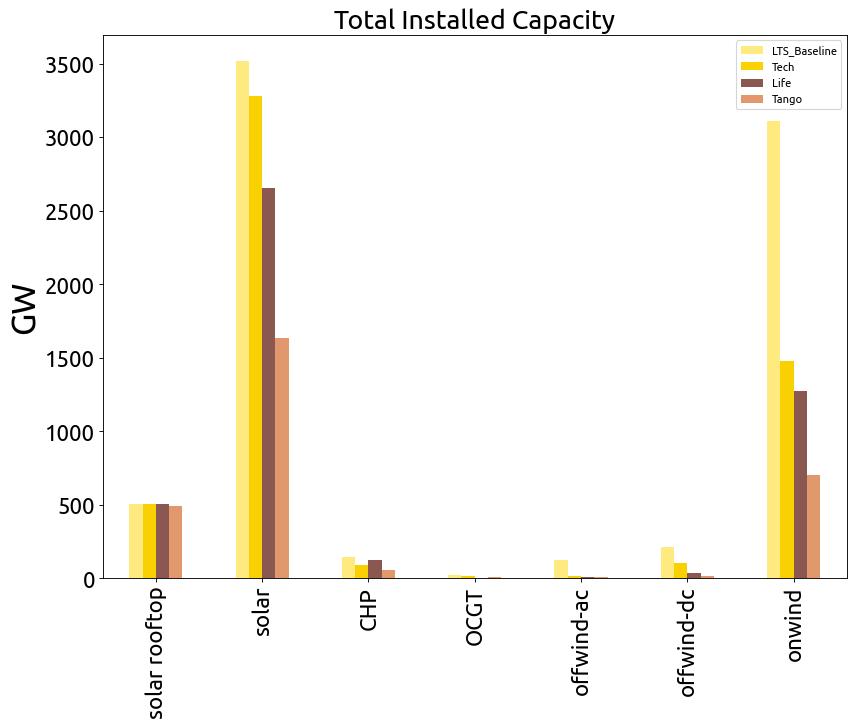

In [224]:
# Print electric generation capacities

e = cap_gen_agg.loc[cap_gen_agg.index.intersection(pd.Index(elec_inds))]
e = aggregate_heat(e,["CHP"])
e = e.drop("ror")
newind = preferred_order.intersection(e.index).append(e.index.difference(preferred_order))

ff1 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Installed Capacity', color='black',size=24)
e.loc[newind].plot(kind='bar', stacked=False, ax=ff1.gca(), color=[config['plotting']['tech_colors'][i] for i in newind],logy=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("GW",fontsize=30)

plt.savefig("results/analysis/"+dirname+"/elec_cap.png", bbox_inches='tight')
plt.show()

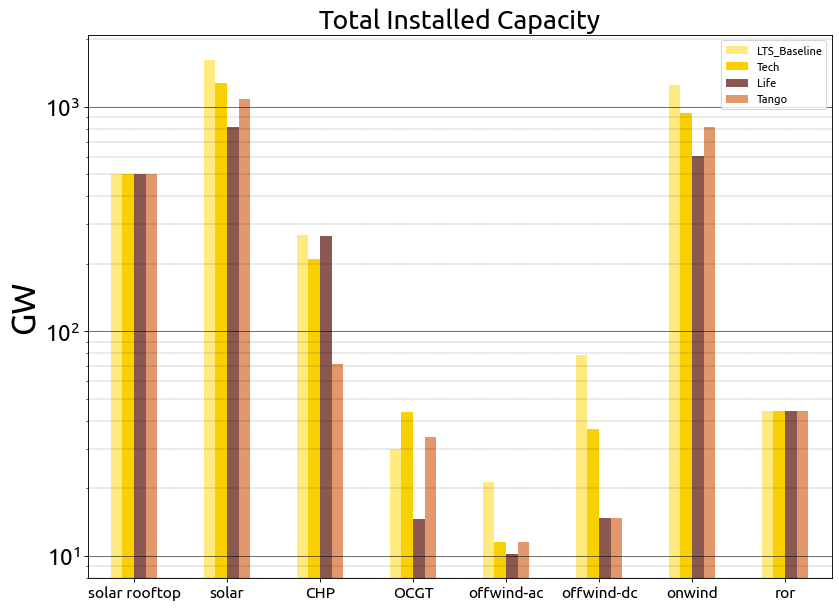

In [444]:
ff11=plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Installed Capacity', color='black',size=24)
e.loc[newind].plot(kind='bar', stacked=False, ax=ff11.gca(), logy=True, color=[config['plotting']['tech_colors'][i] for i in newind])
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(visible=True, axis='y', which='major', color='k', linestyle='-',linewidth=0.5,zorder=-1.0)
plt.grid(visible=True, which='minor', color='k', linestyle='--',linewidth=0.2,zorder=-1.0)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("GW",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/elec_cap_log.png", bbox_inches='tight')
plt.show()

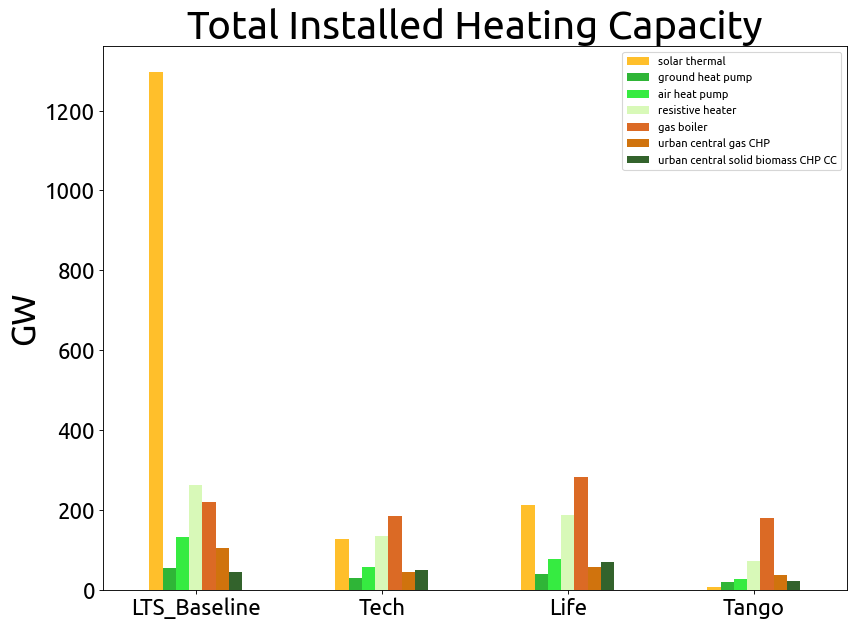

In [227]:
# Print electric generation capacities

h = cap_gen_agg.loc[cap_gen_agg.index.intersection(pd.Index(heat_inds))]
newind = preferred_order.intersection(h.index).append(h.index.difference(preferred_order))

ff2 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Installed Heating Capacity', color='black',size=36)
h.loc[newind].T.plot(kind='bar', stacked=False, ax=ff2.gca(), color=[config['plotting']['tech_colors'][i] for i in newind])
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("GW",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/heat_cap.png", bbox_inches='tight')

plt.show()

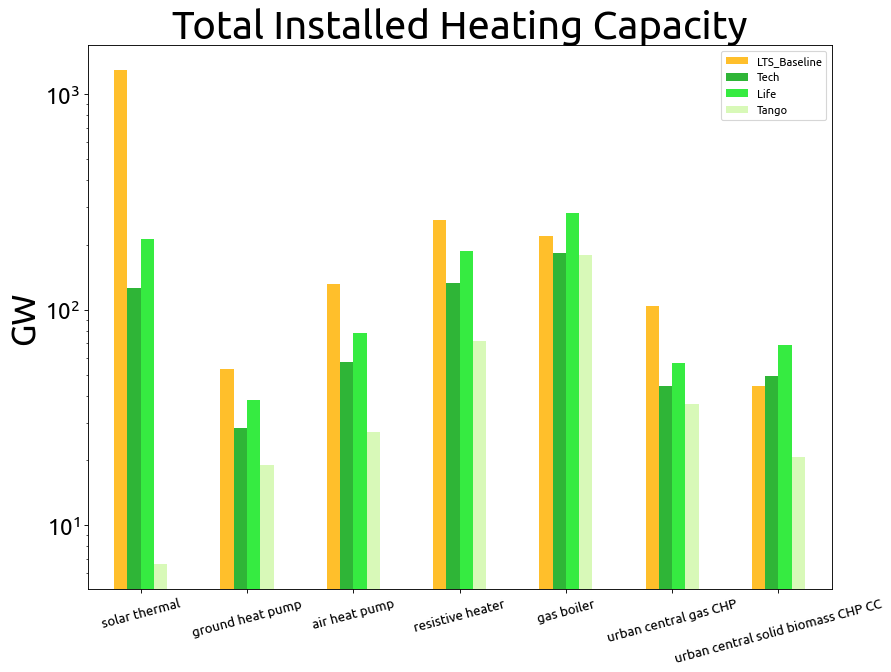

In [235]:
# Print electric generation capacities

h = cap_gen_agg.loc[cap_gen_agg.index.intersection(pd.Index(heat_inds))]
newind = preferred_order.intersection(h.index).append(h.index.difference(preferred_order))

ff2 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Installed Heating Capacity', color='black',size=36)
h.loc[newind].plot(kind='bar', stacked=False, ax=ff2.gca(), color=[config['plotting']['tech_colors'][i] for i in newind],logy=True)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=12,rotation=15)
plt.yticks(fontsize=20)
plt.ylabel("GW",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/heat_cap_semilogy.png", bbox_inches='tight')

plt.show()

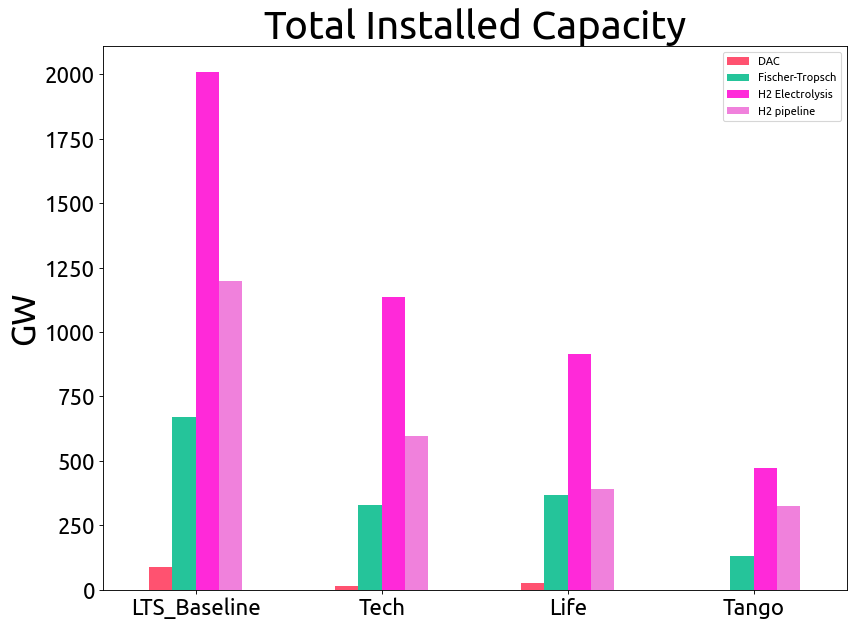

In [236]:
# Print electric generation capacities

sec = cap_gen_agg.loc[cap_gen_agg.index.intersection(pd.Index(secondary))]
newind = preferred_order.intersection(sec.index).append(sec.index.difference(preferred_order))

ff3 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Installed Capacity', color='black',size=36)
sec.loc[newind].T.plot(kind='bar', stacked=False, ax=ff3.gca(), color=[config['plotting']['tech_colors'][i] for i in newind])
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("GW",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/secondary_cap.png", bbox_inches='tight')

plt.show()

Index(['OCGT', 'gas boiler', 'DAC', 'SMR CC',
       'agriculture machinery oil emissions', 'co2', 'gas for industry',
       'gas for industry CC', 'land transport oil emissions', 'oil emissions',
       'process emissions CC', 'shipping oil emissions',
       'solid biomass for industry CC', 'urban central gas CHP',
       'urban central solid biomass CHP CC'],
      dtype='object')


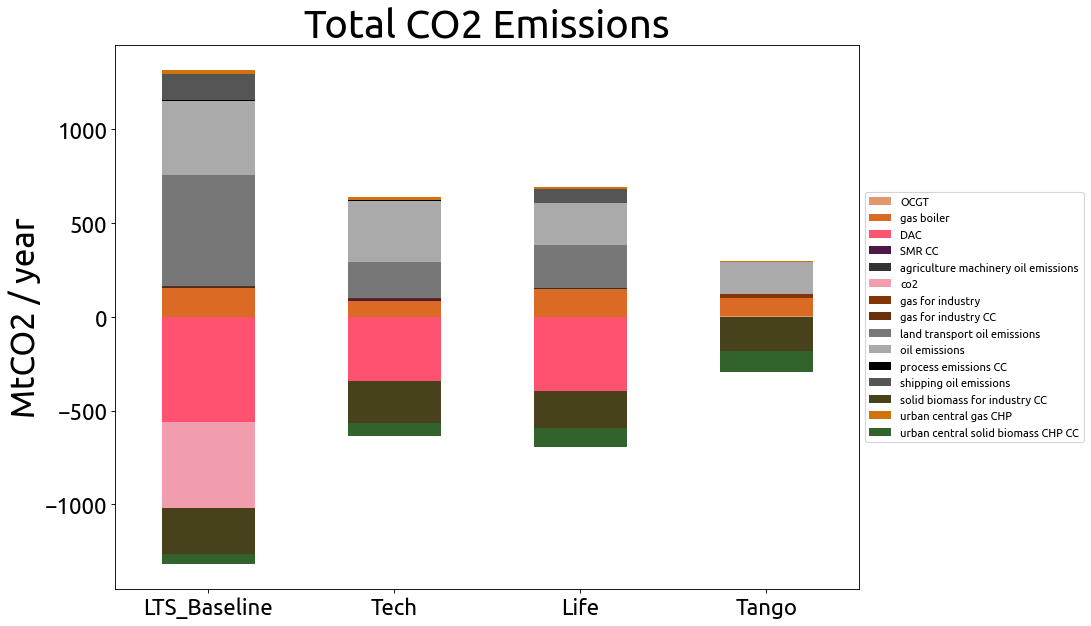

In [415]:
co2 = supply_df.loc["co2"].droplevel(0).fillna(0)
heat_inds = ['solar thermal', 'gas boiler', 'resistive heater', 'air heat pump',\
             'ground heat pump','urban central gas CHP','urban central gas CHP CC', 'urban central solid biomass CHP CC']
co2 = aggregate_heat(co2,heat_inds)
co2 = co2.loc[[i for i in co2.index if abs(sum(co2.loc[i]))>1e5]]/1e6
co2.index = drop_final_numeral(co2.index)
newind = preferred_order.intersection(co2.index).append(co2.index.difference(preferred_order))
print(newind)
ff4 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total CO2 Emissions', color='black',size=36)
co2.loc[newind].T.plot(kind='bar', stacked=True, ax=ff4.gca(), color=[config['plotting']['tech_colors'][i] for i in newind])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("MtCO2 / year",fontsize=30)


plt.savefig("results/analysis/"+dirname+"/co2.png", bbox_inches='tight')

plt.show()


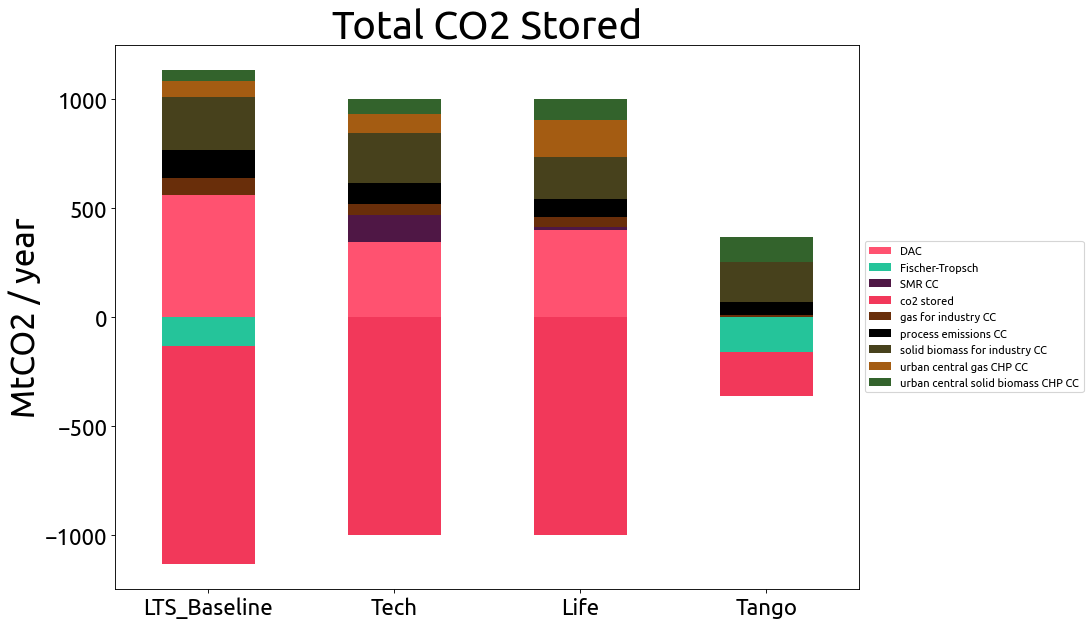

Index(['DAC', 'Fischer-Tropsch', 'SMR CC', 'co2 stored', 'gas for industry CC',
       'process emissions CC', 'solid biomass for industry CC',
       'urban central gas CHP CC', 'urban central solid biomass CHP CC'],
      dtype='object')

In [416]:
co2s = supply_df.loc["co2 stored"].droplevel(0).fillna(0)
co2s = co2s.loc[[i for i in co2s.index if abs(sum(co2s.loc[i]))>1e5]]/1e6
co2s.index = drop_final_numeral(co2s.index)
newind = preferred_order.intersection(co2s.index).append(co2s.index.difference(preferred_order))

ff5 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total CO2 Stored', color='black',size=36)
co2s.loc[newind].T.plot(kind='bar', stacked=True, ax=ff5.gca(), color=[config['plotting']['tech_colors'][i] for i in newind])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("MtCO2 / year",fontsize=30)



plt.savefig("results/analysis/"+dirname+"/co2stored.png", bbox_inches='tight')

plt.show()
newind


# Costs Analysis

In [398]:
# McKinsey estimates $300 billion per year (electric)
# https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/epng/pdfs/transformation_of_europes_power_system.ashx
#

cost_df.sum()/1e9

LTS_Baseline    771.712900
Tech            555.207086
Life            501.362307
Tango           338.104633
dtype: float64

In [194]:
cost2.loc['battery charger']

LTS_Baseline    13597.294605
Tech             7594.676806
Life             3275.524661
Tango            6015.368687
Name: battery charger, dtype: object

In [260]:
cost_df = load_data("results/base_scenarios_64n_25H/csvs/costs.csv")

#cost2 = 
cost2 = pd.DataFrame(index=cost_df.index.get_level_values(2).unique(),columns=cost_df.columns)
for i in cost2.index:
    cost2.loc[i] = cost_df.loc[[j for j in cost_df.index if i==j[2]]].sum()
    
heat_inds = ['solar thermal', 'gas boiler', 'resistive heater', 'air heat pump',\
             'ground heat pump','CHP','water tanks','biomass boiler']

cost2 = aggregate_heat(cost2,heat_inds)

cost2new = cost2.loc[[i for i in cost2.index if cost2.loc[i].sum()>1e9]]/1e9



cost2
print(len(cost2new.index))


excluded = cost2.index.symmetric_difference(cost2new.index)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(cost2new/1e9)

#print(cost2.loc[excluded].sum()/1e9)

print(cost2new.index)

catdict = { "Renewable Electricity" : ['offwind-ac', 'offwind-dc','onwind','solar','solar rooftop','ror','hydro'],
    "Energy Distribution" : ['AC','DC','electricity distribution grid','battery charger','home battery charger'],
    "H2" : ['H2 Electrolysis', 'H2 pipeline','H2'],
    "Fuels" : ['gas','oil','solid biomass'],
    "Combustion Plants" : ['OCGT','gas for industry CC','process emissions CC', 'solid biomass for industry CC'],
    "Heating" : ['solar thermal','gas boiler', 'resistive heater', 'air heat pump', 'ground heat pump','water tanks'],
    "Chemicals" : ['Fischer-Tropsch'],
    "Storage" : ['PHS','battery','home battery','water tanks'],
    "CCUS" : ['co2 stored','DAC']
}

catsums = pd.DataFrame(index = catdict.keys(), columns = cost2.columns)
for i in catsums.index:
    catsums.loc[i] = cost2new.loc[cost2new.index.intersection(pd.Index(catdict[i]))].sum()


cost2/1e9 
catsums



33
Index(['gas', 'offwind-ac', 'offwind-dc', 'oil', 'onwind', 'ror', 'solar',
       'solar rooftop', 'AC', 'DAC', 'DC', 'Fischer-Tropsch',
       'H2 Electrolysis', 'H2 pipeline', 'biogas to gas',
       'electricity distribution grid', 'gas for industry CC',
       'process emissions CC', 'solid biomass for industry CC', 'PHS', 'hydro',
       'H2', 'biogas', 'co2 stored', 'solid biomass', 'solar thermal',
       'gas boiler', 'resistive heater', 'air heat pump', 'ground heat pump',
       'CHP', 'water tanks', 'biomass boiler'],
      dtype='object')


,LTS_Baseline,Tech,Life,Tango
Renewable Electricity,556.951752,338.939478,279.056277,175.541312
Energy Distribution,48.60668,39.761359,39.030875,31.678848
H2,68.201271,36.54755,28.503062,15.446233
Fuels,23.151315,30.900082,25.572528,29.762405
Combustion Plants,12.749188,10.74103,9.316061,7.885498
Heating,98.693066,40.30145,56.72764,21.613642
Chemicals,40.04676,19.685452,22.065074,7.7543
Storage,13.761616,10.587304,10.836148,9.956743
CCUS,52.908617,10.395614,17.243447,1.997852


KeyError: 'biomass boiler'

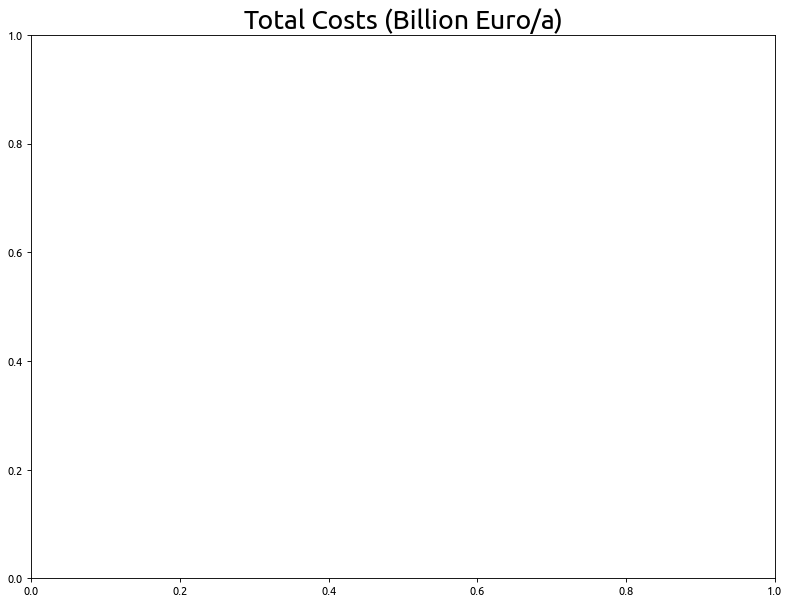

In [261]:
newind = preferred_order.intersection(cost2new.index).append(cost2new.index.difference(preferred_order))

fff1 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Costs (Billion Euro/a)', color='black',size=24)
cost2new.loc[newind].T.plot(kind='bar', stacked=True, ax=fff1.gca(), color=[config['plotting']['tech_colors'][i] for i in newind])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/analysis/"+dirname+"/costs_all.png", bbox_inches='tight')

plt.show()
newind

In [203]:
totcost=cost_df.sum()/1e9
totcost

LTS_Baseline    946.397561
Tech            571.609052
Life            505.894372
Tango           313.791967
dtype: float64

In [204]:
totcost/totcost["LTS_Baseline"]

LTS_Baseline    1.000000
Tech            0.603984
Life            0.534547
Tango           0.331565
dtype: float64

## 

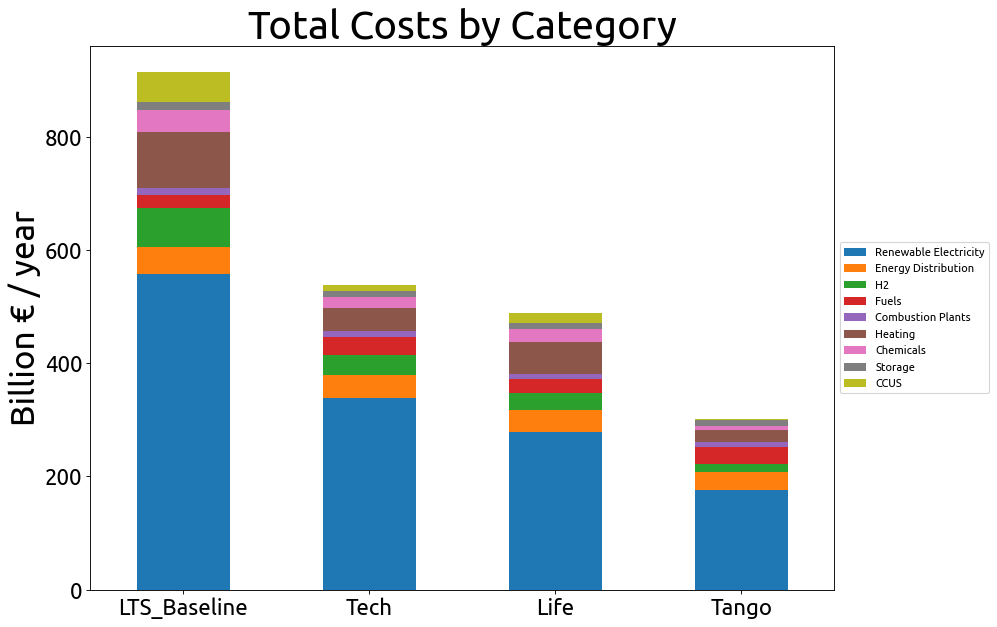

In [262]:
dirname = '64n25H'
fff2 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Costs by Category', color='black',size=36)
catsums.T.plot(kind='bar', stacked=True, ax=fff2.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("Billion € / year",fontsize=30)



plt.savefig("results/analysis/"+dirname+"/costs_categorized.png", bbox_inches='tight')



plt.show()


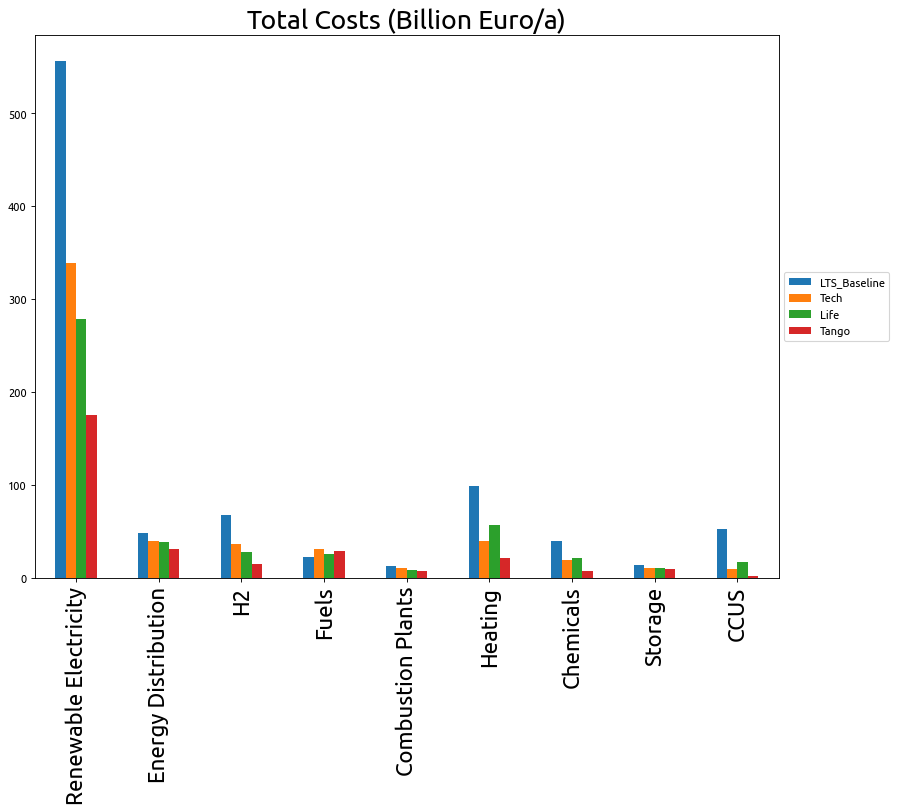

Index(['solid biomass', 'biogas', 'solar thermal', 'solar rooftop', 'solar',
       'ground heat pump', 'air heat pump', 'resistive heater', 'CHP',
       'gas boiler', 'gas', 'AC', 'DAC', 'DC', 'Fischer-Tropsch', 'H2',
       'H2 Electrolysis', 'H2 pipeline', 'PHS', 'biogas to gas',
       'biomass boiler', 'co2 stored', 'electricity distribution grid',
       'gas for industry CC', 'hydro', 'offwind-ac', 'offwind-dc', 'oil',
       'onwind', 'process emissions CC', 'ror',
       'solid biomass for industry CC', 'water tanks'],
      dtype='object')

In [263]:
fff3 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Total Costs (Billion Euro/a)', color='black',size=24)
catsums.plot(kind='bar', stacked=False, ax=fff3.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=20)
plt.savefig("results/analysis/"+dirname+"/costs_categorized_sep.png", bbox_inches='tight')

plt.show()
newind

# Table for presentation

In [ ]:
# Inputs : total demand, total land transport oil, total emissions allowed, total co2 storage

In [532]:
# costs, ratio?

data = pd.DataFrame(index = ['Total Demand','Total Demand (%)','Total ICE Vehicle Demand','Emissions Allowed',\
                             'CO2 Storage Capacity','Total Costs'], columns = supply_df.columns)

In [535]:
tot_d=supply_df.loc[[i for i in supply_df.index if i[1]=="loads" and not i[0]=="co2"] ].fillna(0)*-1
data.loc["Total Demand"]=tot_d.sum()/1e6
data.loc["Total Demand (%)"]=data.loc["Total Demand"]/data.loc["Total Demand"]["LTS_Baseline"]

data.loc["Total ICE Vehicle Demand"] = tot_d.loc[[i for i in tot_d.index if i[2]=="land transport oil"]].sum()/1e6
data.loc["Total Costs"] = cost_df.sum()/1e9
data.loc["Total Costs (%)"] = data.loc["Total Costs"]/data.loc["Total Costs"]["LTS_Baseline"]


data.to_csv("results/analysis/"+dirname+"/info.csv")


In [510]:
spos = supply_df.loc[[i for i in supply_df.index if supply_df.sum(axis=1)[i] > 0]]
sneg = supply_df.loc[[i for i in supply_df.index if supply_df.sum(axis=1)[i] < 0]]

LTS_Baseline  \
scale                            Unnamed: 1 Unnamed: 2                                        
H2                               loads      H2 for industry                    1.914325e+08   
                                            H2 for shipping                    4.035434e+08   
                                            land transport fuel cell           2.140344e+08   
Li ion                           loads      land transport EV                  3.980377e+08   
gas for industry                 loads      gas for industry                   3.720828e+08   
low voltage                      loads      agriculture electricity            3.607329e+07   
                                            agriculture machinery electric     1.217263e+07   
                                            electricity                        1.776163e+09   
                                            industry electricity               1.616696e+09   
oil                              loads      agriculture machinery oil          2.840280e+07   
                                            kerosene for aviation              8.425192e+08   
                                            land transport oil                 2.180436e+09   
                                            naphtha for industry               7.100882e+08   
                                            shipping oil                       5.044293e+08   
process emissions                loads      process emissions                 -1.334683e+08   
residential rural heat           loads      residential rural heat             5.295053e+08   
residential urban decentral heat loads      residential urban decentral heat   6.682192e+08   
services rural heat              loads      agriculture heat                   1.242382e+08   
                                            services rural heat                2.007435e+08   
services urban decentral heat    loads      services urban decentral heat      2.676423e+08   
solid biomass for industry       loads      solid biomass for industry         7.759170e+08   
urban central heat               loads      low-temperature heat for industry  5.726444e+07   
                                            urban central heat                 1.614361e+09   

                                                                                       Tech  \
scale                            Unnamed: 1 Unnamed: 2                                        
H2                               loads      H2 for industry                    1.235680e+08   
                                            H2 for shipping                    8.070868e+08   
                                            land transport fuel cell           6.921776e+08   
Li ion                           loads      land transport EV                  6.005648e+08   
gas for industry                 loads      gas for industry                   2.462663e+08   
low voltage                      loads      agriculture electricity            2.952543e+07   
                                            agriculture machinery electric     2.039962e+07   
                                            electricity                        1.448607e+09   
                                            industry electricity               1.340482e+09   
oil                              loads      agriculture machinery oil         -0.000000e+00   
                                            kerosene for aviation              8.425192e+08   
                                            land transport oil                 7.084402e+08   
                                            naphtha for industry               4.212872e+08   
                                            shipping oil                      -0.000000e+00   
process emissions                loads      process emissions                 -1.011152e+08   
residential rural heat           loads      residential rural heat             3.272127e

# Network Analysis

Determine the total amount of transmission and H2 added to the network

In [19]:
networks = pd.DataFrame()
for r in run_dict.keys():
    rpath = run_dict[r]
    netdir = glob.glob(rpath+"/postnetworks/*.nc")[0]
    n = pypsa.Network(netdir)

    dc_links = n.links[n.links.carrier=="DC"]#[["p_nom","p_nom_opt"]]
    H2_links = n.links[n.links.carrier=="H2 pipeline"]#[["p_nom","p_nom_opt"]]
    ac_links = n.lines#[["s_nom","s_nom_opt"]]

    dc_MWkm = dc_links[["p_nom","p_nom_opt"]].multiply(dc_links["length"],axis=0)
    dc_MWkm_sum = dc_MWkm.sum()

    h2_MWkm = H2_links[["p_nom","p_nom_opt"]].multiply(H2_links["length"],axis=0)
    h2_MWkm_sum = h2_MWkm.sum()

    ac_MWkm = ac_links[["s_nom","s_nom_opt"]].multiply(ac_links["length"],axis=0)
    ac_MWkm_sum = ac_MWkm.sum()
    ac_MWkm_sum

    df = pd.DataFrame(pd.concat([ac_MWkm_sum,dc_MWkm_sum,h2_MWkm_sum]))
    df.index = ["Current AC","New AC","Current DC","New DC","Current H2","New H2"]
    df.columns = [r]

    networks = pd.concat([networks,df],axis=1)

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_LTS_Baseline_s_128_lvopt__Co2L0p10-3H-T-H-B-I-A-seq1e9_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_Tech_s_128_lvopt__Co2L0p00-3H-T-H-B-I-A-seq1e9_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
Importing PyPSA from older

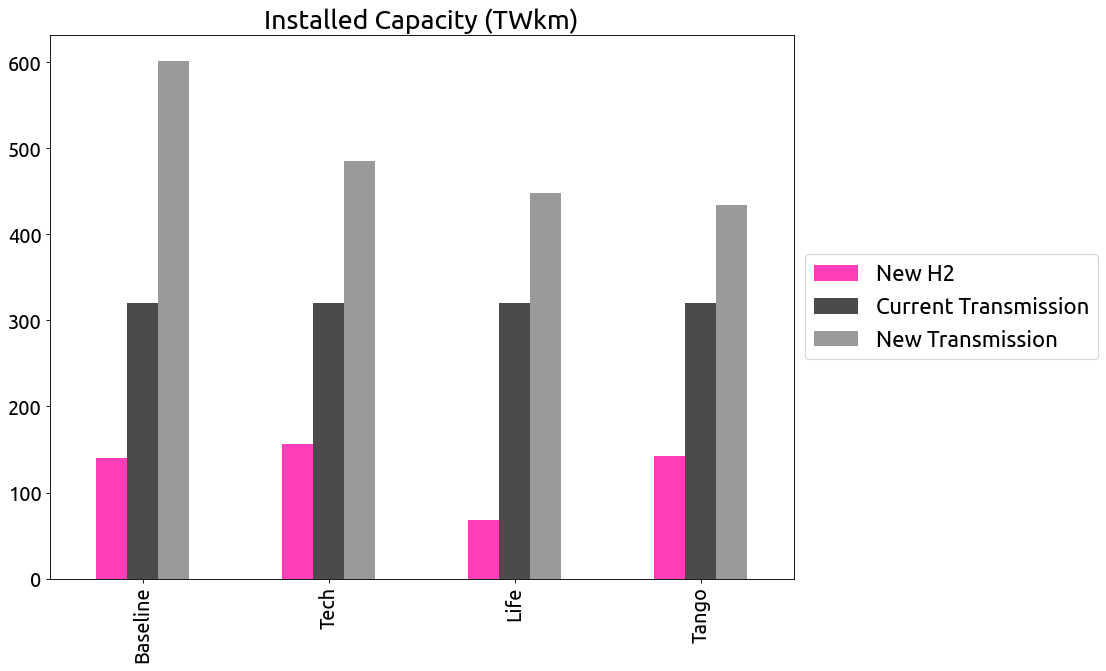

                      Baseline        Tech        Life       Tango
New H2                     0.0   16.806682  -71.752996    2.382486
Current Transmission       0.0    0.000000    0.000000    0.000000
New Transmission           0.0 -116.092536 -154.043596 -167.631050


In [103]:
netplot = networks/1e6
#netplot.index()
netplot.drop("Current H2",inplace=True)
netplot.loc["Current Transmission"] = netplot.loc[["Current AC","Current DC"]].sum()
netplot.loc["New Transmission"] = netplot.loc[["New AC","New DC"]].sum()
netplot.drop(["Current AC","Current DC","New AC","New DC"],inplace=True)
fn1 = plt.figure(figsize=(12, 9), dpi=80)
plt.title('Installed Capacity (TWkm)', color='black',size=24)
netplot.T.plot(kind='bar', stacked=False, ax=fn1.gca(), color = ["#ff3eb7","#4b4b4b","#9a9a9a"])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
#plt.savefig("results/analysis/"+dirname+"/costs_categorized_sep.png", bbox_inches='tight')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig("results/analysis/"+dirname+"/network_construction.png", bbox_inches='tight')


plt.show()
print(netplot.subtract(netplot["Baseline"],axis=0))

In [106]:
netplot.loc["New Transmission Ratio"] = netplot.loc["New Transmission"]/netplot.loc["Current Transmission"]
netplot

,Baseline,Tech,Life,Tango
New H2,139.535166,156.341848,67.782170,141.917652
Current Transmission,320.644284,320.644284,320.644284,320.644284
New Transmission,601.417184,485.324648,447.373588,433.786134
New Transmission Ratio,1.875652,1.513592,1.395233,1.352858


In [107]:
(601.417184-433.786134)/601.417184
139.535166

0.2787267382103934

# Rates of installation of generators (% of max capacity)

In [22]:
net_dict = {}
for k in run_dict.keys():
    print(k)
    netdir = glob.glob(run_dict[k]+"/postnetworks/*.nc")[0]
    net_dict[k] = pypsa.Network(netdir)


Baseline


Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_LTS_Baseline_s_128_lvopt__Co2L0p10-3H-T-H-B-I-A-seq1e9_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Tech


Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_Tech_s_128_lvopt__Co2L0p00-3H-T-H-B-I-A-seq1e9_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Life


Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_Life_s_128_lvopt__Co2L0p00-3H-T-H-B-I-A-seq1e9_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Tango


Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version [0, 19, 3].

INFO:pypsa.io:Imported network elec_sc_Tango_s_128_lvopt__Co2L0p00-3H-T-H-B-I-A_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [23]:
def get_max_capacity(n,by_node = False):
    caps = n.generators[['p_nom_max','p_nom_opt','carrier']]
    max_cap = caps['p_nom_max']
    
    if by_node:
        return max_cap
    
    tot_by_gen = max_cap.groupby('carrier').sum()
    return max_cap
    

def get_percent_installed(n, by_node = False):    
    caps = n.generators[['p_nom_max','p_nom_opt','carrier']]
    #pct_by_node = caps['p_nom_opt']/caps['p_nom_max']
    caps_by_gen = caps.copy(deep=True)
    caps_by_gen.loc[caps_by_gen.carrier=="ror","p_nom_max"] = caps_by_gen.loc[caps_by_gen.carrier=="ror"]["p_nom_opt"]
    caps_by_gen[['p_nom_max','p_nom_opt']] = caps_by_gen[['p_nom_max','p_nom_opt']]/1e3
    
    
    caps_by_gen.columns = ["Maximum Potential (GW)","Installed (GW)","carrier"]
    
    if by_node:
        caps_by_gen["ratio"] = caps_by_gen['Installed (GW)']/caps_by_gen['Maximum Potential (GW)']
        return caps_by_gen
    
    
    caps_by_gen.set_index('carrier', append=True, inplace=True)
    tot_by_gen = caps_by_gen.groupby('carrier').sum()
    
    
    

    pd.set_option('display.max_columns', None)
    #n.generators_t.loc[caps.carrier == "urban central solar thermal"].head(2)
    tot_by_gen["ratio"] = tot_by_gen['Installed (GW)']/tot_by_gen['Maximum Potential (GW)']
    #pct_by_gen = pct_by_gen.dropna()

    return tot_by_gen

pcts_installed = pd.DataFrame()



get_percent_installed(net_dict["Baseline"],False)

all_pcts = pd.DataFrame()


for k in net_dict.keys():
    p = get_percent_installed(net_dict[k],False)
    p=p.rename(columns = {'Installed (GW)': k+' (GW)'})
    all_pcts = pd.concat([all_pcts,p[k+" (GW)"]],axis=1)

all_pcts = pd.concat([p["Maximum Potential (GW)"],all_pcts],axis=1)
    
all_pcts

,Maximum Potential (GW),Baseline (GW),Tech (GW),Life (GW),Tango (GW)
gas,inf,7462.553512,1030.262722,1080.333531,5464.720889
offwind-ac,598.893694,21.283125,11.506627,10.225678,11.506599
offwind-dc,426.128370,78.844003,36.864983,14.767016,14.767053
oil,inf,483.126464,242.840551,245.740956,5.993345
onwind,8758.838803,1252.812721,937.727198,603.772698,815.018582
residential rural solar thermal,NaN,0.000259,0.000180,0.000129,0.000205
residential urban decentral solar thermal,NaN,0.000283,0.000194,0.000139,0.000220
ror,44.379841,44.379841,44.379841,44.379841,44.379841
services rural solar thermal,NaN,0.000252,0.000176,0.000126,0.000199
services urban decentral solar thermal,NaN,0.000283,0.000192,0.000140,0.000218


In [73]:
n = net_dict["Baseline"]
n.generators.loc[n.generators.carrier == "residential urban decentral solar thermal"].sum()


p_nom_max                                                             inf
weight                                                                0.0
p_nom                                                                 0.0
capital_cost                                               2992265.291357
p_nom_min                                                             0.0
marginal_cost                                                    1.279363
efficiency                                                          128.0
p_nom_extendable                                                      128
bus                     AL1 0 residential urban decentral heatAT1 0 re...
carrier                 residential urban decentral solar thermalresid...
control                 SlackSlackSlackSlackSlackSlackSlackSlackSlackS...
p_nom_opt                                                        0.283476
lifetime                                                           2560.0
type                                  

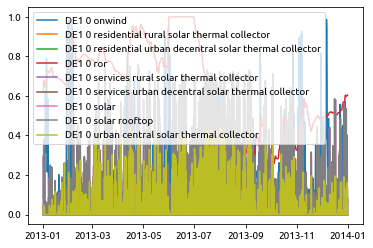

In [16]:
cols = [c for c in n.generators_t.p_max_pu if "DE1 0" in c]
plt.plot(n.generators_t.p_max_pu[cols],label = cols)
plt.legend(loc="upper left")

# Lorentz Curve

In [ ]:

# get total consumption per node

# get total generation per node

# sort by supply/demand ratio

# plot it


# System Dynamics


## Peaks

In [184]:
def get_tot_elec_load(n,by_node=False):
    elec_carriers = ['electricity', 'land transport EV',\
    'industry electricity','agriculture electricity','agriculture machinery electric']

    elec_loads = n.loads.loc[[i for i in n.loads.index if n.loads.loc[i]['carrier'] in elec_carriers]]

    elec_buses = n.buses[n.buses.carrier=="AC"]

    elec_link_loads = n.links.loc[[i for i in n.links.index if n.links.loc[i]['bus0'] in elec_buses.index\
                                   and not n.links.loc[i]['bus1'] in elec_buses.index]]


    link_load_t = n.links_t.p0[elec_link_loads.index]

    bus_load_t = n.loads_t.p[elec_loads.index]

    #bus_load_t.sum(axis=1)[1000:1100].plot()
    #link_load_t.sum(axis=1)[1000:1100].plot()

    nodes = n.buses.location.unique()
    elec_series_total = link_load_t#sum(axis=1)
    
    if not by_node:
        return elec_series_total
    
    l = elec_series_total
    
    nodes = n.buses.location.unique()
    nodal_load = pd.DataFrame(index = l.index, columns = nodes)
    for nn in nodes:
        nodal_load[nn] = l[[c for c in l.columns if nn in c]].sum(axis=1)
    
    
    
    return nodal_load
    
get_tot_elec_load(n).sum()
    
    

Link
AL1 0 H2 Electrolysis                  3.169758e+06
AT1 0 H2 Electrolysis                  4.652610e+01
AT1 1 H2 Electrolysis                  2.040319e+01
BA1 0 H2 Electrolysis                  2.025608e+01
BE1 0 H2 Electrolysis                  4.160954e+01
                                           ...     
SE2 2 electricity distribution grid    5.589024e+06
SE2 3 electricity distribution grid    7.277130e+05
SE2 4 electricity distribution grid    1.959187e+07
SI1 0 electricity distribution grid    6.513704e+06
SK1 0 electricity distribution grid    1.131477e+07
Length: 512, dtype: float64

In [182]:
vre = n.generators_t.p
other_gen = [
        'H2 Fuel Cell',
        'OCGT',
        'urban central gas CHP',
        'urban central solid biomass CHP'
        ]

other_gen_links = [i for i  in n.links.index if any(n.links.loc[i]["carrier"] == g for g in other_gen)]

n.links.loc[other_gen_links].head(3)
#print(n.links_t.p0[other_gen_links].head(3))
#print(n.links_t.p1[other_gen_links].head(3))

gen_links_sum = n.links_t.p1[other_gen_links].sum() * 3 * -1


vre_sum = vre.sum()*3



nodes = n.buses.location.unique()
nodal_gen = pd.Series(index = nodes)
for nn in nodes:
    x=0
    nodal_gen[nn] = gen_links_sum[[i for i in gen_links_sum.index if nn in i]].sum() + \
                    vre_sum[[i for i in vre_sum.index if nn in i]].sum()


nodal_gen



/tmp/ipykernel_12396/874827593.py:23: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



AL1 0    2.776072e+07
AT1 0    3.110275e+07
AT1 1    4.338383e+07
BA1 0    4.840059e+06
BE1 0    2.731463e+07
             ...     
SE2 3    1.300987e+05
SE2 4    3.554296e+07
SI1 0    9.975569e+06
SK1 0    2.158015e+07
EU       5.444172e+09
Length: 129, dtype: float64

array(['battery charger', 'battery discharger'], dtype=object)

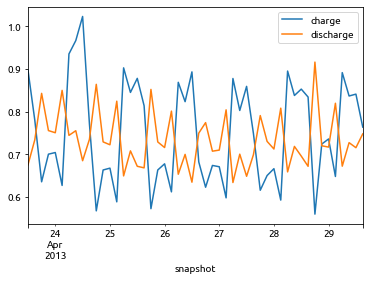

In [170]:
# Look at buses for each electric carrier
# AC
# battery
# Li ion 
# low voltage
# home battery 
def find_links_to_buses(n,buses):
    return n.links.loc[[i for i in n.links.index if n.links.loc[i]['bus0'] in buses\
                                   or n.links.loc[i]['bus1'] in buses]]


batteries = n.buses.loc[n.buses.carrier == "battery"]
batteries
n.links.carrier.unique()
n.links_t.p0[[c for c in n.links_t.p0.columns if "home battery charger" in c]].sum(axis=1)[900:950].plot()
n.links_t.p0[[c for c in n.links_t.p0.columns if "home battery discharger" in c]].sum(axis=1)[900:950].plot()
plt.legend(["charge","discharge"])
batteries


batt_links = find_links_to_buses(n,batteries.index)
#n.links_t.p0[batt_buses.index].sum(axis=1)

batt_links.carrier.unique()


In [79]:
peaks = pd.DataFrame(columns = ["peak load","total load"])
for r in net_dict.keys():
    print(r)
    #rpath = run_dict[r]
    #netdir = glob.glob(rpath+"/postnetworks/*.nc")[0]
    n = net_dict[r]

    elec_carriers = ['electricity', 'land transport EV',\
    'industry electricity','agriculture electricity','agriculture machinery electric']

    elec_loads = n.loads.loc[[i for i in n.loads.index if n.loads.loc[i]['carrier'] in elec_carriers]]

    elec_buses = n.buses[n.buses.carrier=="AC"]

    elec_link_loads = n.links.loc[[i for i in n.links.index if n.links.loc[i]['bus0'] in elec_buses.index\
                                   and not n.links.loc[i]['bus1'] in elec_buses.index]]


    link_load_t = n.links_t.p0[elec_link_loads.index]

    bus_load_t = n.loads_t.p[elec_loads.index]

    #bus_load_t.sum(axis=1)[1000:1100].plot()
    #link_load_t.sum(axis=1)[1000:1100].plot()

    elec_series_total = link_load_t.sum(axis=1)

    peak = elec_series_total.max()/1e6
    total = elec_series_total.sum()/1e6*3
    
    
    
    peaks = pd.concat([peaks, pd.DataFrame([[peak,total]], columns = peaks.columns,index=[r])],axis=0)
    
peaks

Baseline
Tech
Life
Tango


,peak load,total load
Baseline,1.510410,6830.705941
Tech,1.195546,5409.620564
Life,0.819324,4006.294741
Tango,1.056045,4608.196869


In [81]:
peaks["Peak/Base"] = peaks["peak load"]*8760/peaks["total load"]
peaks.columns = ["Peak Load (TW)","Total Load (TWh)","Peak/Base"]
peaks.to_csv("results/analysis/"+dirname+"/peaks.csv")

# Timeseries

['H2 Electrolysis' 'battery charger' 'helmeth'
 'electricity distribution grid']
['electricity' 'land transport EV' 'industry electricity'
 'agriculture electricity' 'agriculture machinery electric']


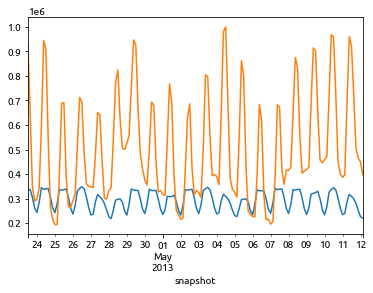

In [90]:
bus_load_t.sum(axis=1)[900:1050].plot()
link_load_t.sum(axis=1)[900:1050].plot()
print(elec_link_loads.carrier.unique())
print(elec_loads.carrier.unique())

<AxesSubplot:xlabel='snapshot'>

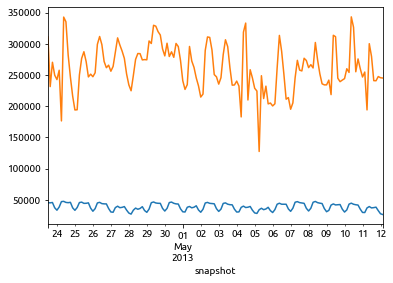

In [102]:
n.loads_t.p[[c for c in n.loads_t.p.columns if c.endswith("0")]].sum(axis=1)[900:1050].plot()
n.links_t.p0[[c for c in n.links_t.p0.columns if "distribution" in c]].sum(axis=1)[900:1050].plot()

## Distribution Level Timeseries

,industry electricity,agriculture electricity,agriculture machinery electric,electricity,land transport EV
snapshot,,,,,
2013-01-01 00:00:00,127883.536781,2945.84139,2070.050738,33479.554443,8177.861101
2013-01-01 03:00:00,127883.536781,2945.84139,2070.050738,26035.985987,19573.718963
2013-01-01 06:00:00,127883.536781,2945.84139,2070.050738,26373.959566,64947.655726
2013-01-01 09:00:00,127883.536781,2945.84139,2070.050738,32665.025492,61555.745091
2013-01-01 12:00:00,127883.536781,2945.84139,2070.050738,34477.108317,63486.136022


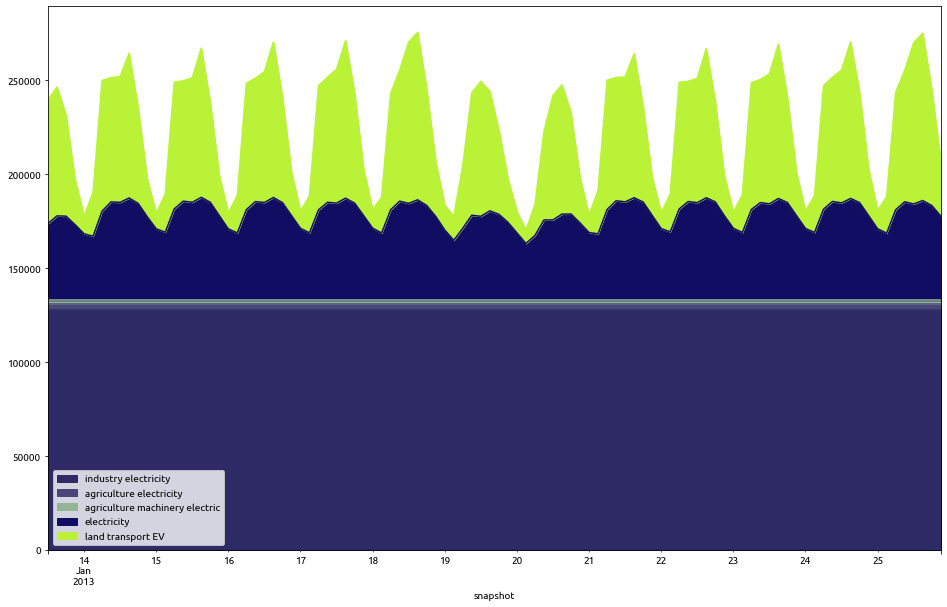

In [218]:
sum_bus_load = pd.DataFrame()

for load in elec_loads.carrier.unique():
    sum_bus_load[load] = n.loads_t.p[[c for c in n.loads_t.p.columns if load in c]].sum(axis=1)
sum_bus_load["electricity"] = n.loads_t.p[[c for c in n.loads_t.p.columns if c.endswith("0")]].sum(axis=1)
sum_bus_load = sum_bus_load[['industry electricity','agriculture electricity', 'agriculture machinery electric',\
                              'electricity', 'land transport EV']]

sum_bus_load[100:200].plot.area(figsize=(16,10),color = [config['plotting']['tech_colors'][c] for c in sum_bus_load.columns])
#plt.plot(sum_bus_load.index[100:200],sum_bus_load[100:200].sum(axis=1),linewidth=40)#.max()*np.ones(sum_bus_load.index.size))
#plt.legend(sum_bus_load.columns,prop={'size': 15})
sum_bus_load.head(5)

## Transmission Level Timeseries

['H2 Electrolysis' 'battery charger' 'helmeth'
 'electricity distribution grid']


<AxesSubplot:xlabel='snapshot'>

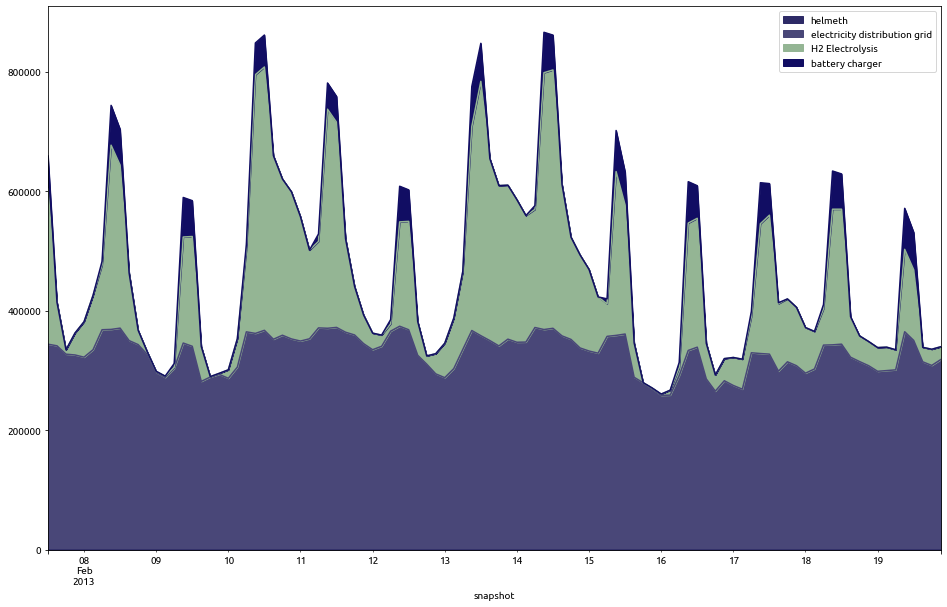

In [217]:
n.links_t.p0[elec_link_loads.index]
linktypes = elec_link_loads.carrier.unique()

print(linktypes)

link_load_sum = pd.DataFrame(index = n.links_t.p0.index, columns=linktypes)
for l in linktypes:
    link_load_sum[l] = n.links_t.p0[[i for i in elec_link_loads.index if elec_link_loads.loc[i]['carrier']==l]].sum(axis=1)

    
link_load_sum = link_load_sum[["helmeth","electricity distribution grid","H2 Electrolysis","battery charger"]]    
    
link_load_sum[300:400].plot.area(figsize=(16,10),color = [config['plotting']['tech_colors'][c] for c in sum_bus_load.columns])
#plt.step(link_load_sum.index[300:400],link_load_sum[300:400])
#link_load_sum[300:400].plot(kind="bar",stacked=True,width = 1,figsize=(16,10))

## Electricity Generation

In [355]:
[i for i in n.generators.index if n.generators.loc[i]["bus"] in link_buses]

['ES1 0 offwind-ac', 'ES1 0 onwind', 'ES1 0 solar', 'ES1 0 solar rooftop']

In [365]:
## Get all generators

def get_buses_named(name):
    return [i for i in n.buses.index if name in i]

def get_carriers_buses(n,carriers, nodes = []):
    
    if nodes:
        node_buses = n.buses.loc[nodes]
    else:
        node_buses = n.buses
    
    if type(carriers)==str:
        return node_buses.loc[node_buses.carrier==carriers].index
    elif type(carriers)==list:
        return [i for i in node_buses.index if node_buses.loc[i]['carrier'] in carriers]

def get_generator_links(n, link_buses):
    return [i for i in n.links.index if n.links.loc[i]["bus1"] in link_buses and not n.links.loc[i]["bus0"] in link_buses]

def get_total_link_generation(n,link_buses):
    link_generators = get_generator_links(n,link_buses)
    link_gen_carriers = [c for c in n.links.loc[link_generators]["carrier"].unique() if not "CC" in c]
    
    tot_link_gen = pd.DataFrame(index = n.links_t.p1.index, columns = link_gen_carriers)
    
    for c in link_gen_carriers:
        tot_link_gen[c] = n.links_t.p1[[i for i in n.links.index\
                                        if n.links.loc[i]["carrier"] == c and i in link_generators
                                        ]].sum(axis=1) * -1
        
    return tot_link_gen

def get_tot_generation(n,link_buses):
                       
    # generators labeled as such in pypsa                   
    gens = [i for i in n.generators.index if n.generators.loc[i]["bus"] in link_buses]
    gen_carriers = n.generators.loc[gens]["carrier"].unique()
    
    tot_gen = pd.DataFrame(index = n.generators_t.p.index, columns = gen_carriers)
    
    for c in gen_carriers:
        tot_gen[c] = n.generators_t.p[[i for i in n.generators.index \
                                       if n.generators.loc[i]["carrier"]==c and i in gens\
                                      ]].sum(axis=1)

        
    return tot_gen

def get_plot_colors(techs):
    return [config['plotting']['tech_colors'][c] for c in techs]

busname = "NO"



link_buses = get_carriers_buses(n,['AC','low voltage'],get_buses_named(busname))#,'battery', 'Li ion','home battery'])


tot_link_gen = get_total_link_generation(n,link_buses)#[200:300].plot(figsize=(16,12))

link_gen_order = ['urban central solid biomass CHP','H2 Fuel Cell','OCGT',\
                             'urban central gas CHP',\
                             'battery discharger', 'home battery discharger','V2G'
                            ]

tot_link_gen = tot_link_gen[[i for i in link_gen_order if i in tot_link_gen.columns]]

gen_order = ["ror","offwind-dc","offwind-ac","onwind","solar","solar rooftop"]

tot_gen = get_tot_generation(n,link_buses)


tot_gen = tot_gen[[i for i in gen_order if i in tot_gen.columns]]
#tot_gen[100:200].plot.area(figsize=(16,12),color = get_plot_colors(tot_gen.columns))

all_gen = pd.concat([tot_gen,tot_link_gen],axis=1)


## NEED TO ADD STORAGE UNITS



<AxesSubplot:xlabel='snapshot'>

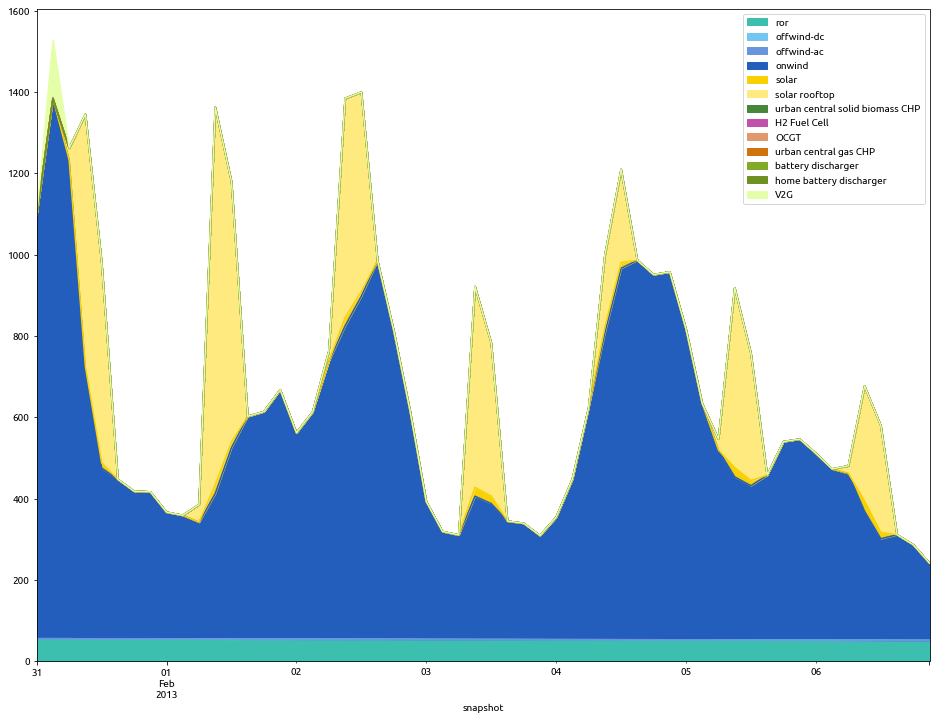

In [366]:
all_gen[240:296].plot.area(figsize=(16,12),color = get_plot_colors(all_gen.columns))


In [290]:
n.generators_t.p[[i for i in n.generators.index if n.generators.loc[i]["bus"] in link_buses]]
n.generators

,p_nom_max,weight,p_nom,capital_cost,p_nom_min,marginal_cost,efficiency,p_nom_extendable,bus,carrier,control,p_nom_opt,lifetime,type,p_min_pu,p_max_pu,p_set,q_set,sign,build_year,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL1 0 offwind-ac,3.695647e+03,412.270445,0.000000,168170.272510,0.000000,0.024920,1.0,True,AL1 0,offwind-ac,Slack,0.000734,inf,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 onwind,6.748682e+04,1762.450888,0.000000,102275.853072,0.000000,0.025793,1.0,True,AL1 0,onwind,,0.001157,inf,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 ror,inf,48.200000,48.200000,270940.715283,0.000000,0.009380,0.9,False,AL1 0,ror,,48.200000,inf,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 solar,1.793499e+04,2747.732990,16.850000,39883.201244,16.850000,0.019412,1.0,True,AL1 0,solar,,17934.991134,inf,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT1 0 onwind,5.413579e+04,813.045478,357.754033,102275.853072,357.754033,0.025034,1.0,True,AT1 0,onwind,,357.754046,inf,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE2 1 solar rooftop,4.074325e+03,NaN,0.000000,31671.474355,0.000000,0.020420,1.0,True,SE2 1 low voltage,solar rooftop,Slack,4074.324806,40.0,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SE2 2 solar rooftop,7.222168e+02,NaN,0.000000,31671.474355,0.000000,0.020410,1.0,True,SE2 2 low voltage,solar rooftop,Slack,722.216633,40.0,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SE2 4 solar rooftop,3.684752e+03,NaN,0.000000,31671.474355,0.000000,0.020731,1.0,True,SE2 4 low voltage,solar rooftop,Slack,3684.752047,40.0,,0.0,1.0,0.0,0.0,1.0,0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [221]:
print("One Port COMPS")
for c in n.iterate_components(n.one_port_components):
    print(c.name)
    
print("Branch COMPS")
for c in n.iterate_components(n.branch_components):
    print(c.name)
    

One Port COMPS
StorageUnit
Store
Generator
Load
Branch COMPS
Link
Line


<AxesSubplot:xlabel='snapshot'>

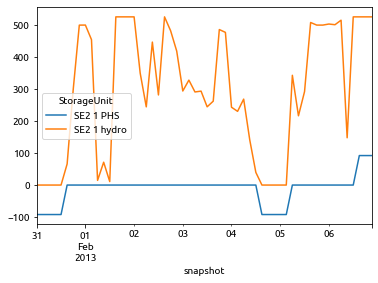

In [374]:
n.storage_units_t.p[[c for c in n.storage_units_t.p.columns if "SE2 1" in c]][240:296].plot()

# Network Congestion

In [309]:
import seaborn as sns


In [333]:
def get_network_congestion(n,cong_lvl=0.999,frq_cong_lvl=0.1):
    max_flow = n.lines.s_nom_opt * n.lines.s_max_pu
    flow_ratio = n.lines_t.p0.divide(max_flow,axis=1)
    x = abs(flow_ratio)>cong_lvl
    hours_congested = x.sum() * n.snapshot_weightings["generators"][0]
    pct_congest_total = hours_congested.sum() / (8760*len(hours_congested))
    pct_congest = hours_congested/8760
    freq_congest_lines = sum(pct_congest>frq_cong_lvl)
    pct_congested_lines = freq_congest_lines / len(n.lines.index)
    
    info = {
        "Line-hours Congested" : hours_congested.sum(),
        "% Line-hours Congested" : pct_congest_total,
        "Frequently Congested Lines" : freq_congest_lines, 
        "% Frequently Congested Lines" : pct_congested_lines
    }
    
    return pd.DataFrame.from_dict(info,orient='index',columns=[''])#pd.DataFrame(info)

def get_congestion_timeseries(n,cong_lvl=0.999,frq_cong_lvl=0.1):
    max_flow = n.lines.s_nom_opt * n.lines.s_max_pu
    flow_ratio = n.lines_t.p0.divide(max_flow,axis=1)
    x = abs(flow_ratio)>cong_lvl
    hours_congested = x.sum() * n.snapshot_weightings["generators"][0]

    return pd.DataFrame(x)

In [274]:

postglob = glob.glob("results/Large_Run_128n3H/postnetworks/*.nc")
postnets = {}
for g in postglob:
    print(g)
    postnets[ g.split('/')[3].split('_')[2] ]  = pypsa.Network(g)
    
postnets


results/Large_Run_128n3H/postnetworks/elec_sc_Tech_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc


INFO:pypsa.io:Imported network elec_sc_Tech_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


results/Large_Run_128n3H/postnetworks/elec_sc_Tango_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc


INFO:pypsa.io:Imported network elec_sc_Tango_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


results/Large_Run_128n3H/postnetworks/elec_sc_Life_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc


INFO:pypsa.io:Imported network elec_sc_Life_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


results/Large_Run_128n3H/postnetworks/elec_sc_LTS_Baseline_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc


INFO:pypsa.io:Imported network elec_sc_LTS_Baseline_s_128_lv1.5__Co2L0p00-3H-T-H-B-I-A-seq12e8_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


{'Tech': Network , 'Tango': Network , 'Life': Network , 'LTS': Network }

In [328]:
congestion = pd.DataFrame()
for pn in postnets.keys():
    df = get_network_congestion(postnets[pn],0.999,0.2).set_axis([pn],axis=1)
    congestion=pd.concat([congestion, df], axis=1)
congestion

,Tech,Tango,Life,LTS
Line-hours Congested,168423.000000,144747.000000,151866.000000,251586.000000
% Line-hours Congested,0.083593,0.071842,0.075375,0.124869
Frequently Congested Lines,16.000000,15.000000,14.000000,38.000000
% Frequently Congested Lines,0.069565,0.065217,0.060870,0.165217


In [334]:
hrs_congestion= pd.DataFrame()

for pn in postnets.keys():
    df1 = get_congestion_timeseries(postnets[pn]).set_axis([pn],axis=1)

    hrs_congestion=pd.concat([hrs_congestion, df1], axis=1)
#sns.histplot(data=hrs_congestion,   element="step")
#sns.histplot(penguins, x="flipper_length_mm", hue="species", element="step")

ValueError: Length mismatch: Expected axis has 230 elements, new values have 1 elements

In [343]:
df1=get_congestion_timeseries(postnets[pn])
time_cong = pd.DataFrame(index=df1.index,columns = ['cong'])
for i in df1.index:
    time_cong.loc[i,'cong'] = any(df1.loc[i])


In [345]:
time_cong.sum()

cong    2919
dtype: object

In [105]:
len(n.lines.index)

228

In [74]:

max_flow = n.lines.s_nom_opt * n.lines.s_max_pu

In [75]:
flow_ratio = n.lines_t.p0.divide(max_flow,axis=1)

In [76]:
flow_ratio.size

665760

In [87]:
x = abs(flow_ratio)>0.99
hours_congested = x.sum() * n.snapshot_weightings["generators"][0]
hours_congested

Line
1      1317.0
2      1401.0
3      5433.0
4      2220.0
5      1392.0
        ...  
224     543.0
225    1209.0
226     327.0
227     840.0
228     207.0
Length: 228, dtype: float64

In [89]:
pct_congest_total = hours_congested.sum() / (8760*len(hours_congested))
pct_congest_total

0.09242369622686854

In [103]:
pct_congest = hours_congested/8760
pct_congest.sort_values(ascending=False).head(50)
freq_congest_lines = sum(pct_congest>0.1)
freq_congest_lines 

79

In [107]:
pct_congested_lines = freq_congest_lines / len(n.lines.index)
pct_congested_lines

0.34649122807017546

In [85]:
vals = [0.9, 0.99, 0.999, 0.9999]
b = pd.Series()
for v in vals:
    x = abs(flow_ratio)>v
    hours_congested = x.sum().sum() * n.snapshot_weightings["generators"][0]
    b[v] = hours_congested
b

/tmp/ipykernel_3150/2470757924.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



0.9000    312717.0
0.9900    184596.0
0.9990    166917.0
0.9999    151107.0
dtype: float64

In [108]:
n.generators.carrier

Generator
AL1 0 offwind-ac          offwind-ac
AL1 0 onwind                  onwind
AL1 0 ror                        ror
AL1 0 solar                    solar
AT1 0 onwind                  onwind
                           ...      
SE2 1 solar rooftop    solar rooftop
SE2 2 solar rooftop    solar rooftop
SE2 4 solar rooftop    solar rooftop
SI1 0 solar rooftop    solar rooftop
SK1 0 solar rooftop    solar rooftop
Name: carrier, Length: 1241, dtype: object

In [173]:
carrier_list = np.hstack((n.generators.carrier.unique(), n.links.carrier.unique(),
                                n.stores.carrier.unique(), n.storage_units.carrier.unique()))

In [174]:
suptechs = map(lambda c: c.split("-", 2)[0], carrier_list)
#cc = "solar"
#cc.startswith(tuple(suptechs))
print(oo)
any([l.endswith(oo[0]) for l in tuple(suptechs)])

0    CC
dtype: object


True

In [165]:
#oo = pd.Series([])
#oo[0]="CC"
#oo[0].startswith(tuple(suptechs)) or any([l.endswith(oo[0]) for l in list(suptechs)])
any([l.endswith(oo[0]) for l in list(suptechs)])

False

In [167]:
any([l.endswith(oo[0]) for l in tuple(suptechs)])

False

In [180]:
suptechs = map(lambda c: c.split("-", 2)[0], carrier_list)

tuple_suptechs = tuple(suptechs)

In [183]:
tuple_suptechs
tuple_suptechs
(oo[0].startswith(tuple_suptechs) or any([l.endswith(oo[0]) for l in tuple_suptechs]))

True